**Aggregate Climate Data Reading**

This file takes NOAA GSOM data, consisting of a large number of individual csv files, and compiles relevant information into a single csv file containing cleaned data.

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import wget

First, we'll grab the relevant directories and take a list of attributes out of a provided sample file

In [3]:
root = os.getcwd()
sample_df = pd.read_csv(root + "\\gsoy_sample_csv.csv")
print(sample_df)

root += '\\gsoy-latest'
files = os.listdir(root)

       STATION                                    NAME  LATITUDE  LONGITUDE  \
0  USW00014768  ROCHESTER GREATER INTERNATIONAL, NY US   43.1167   -77.6767   
1  USC00309049                     WEBSTER 2 NE, NY US   43.2419   -77.3882   

   ELEVATION  DATE  CLDD CLDD_ATTRIBUTES  HTDD HTDD_ATTRIBUTES  ...  AWND  \
0      164.3  2015   376               W  3834               W  ...   8.9   
1       83.8  2015   319               7  3914               7  ...   NaN   

  AWND_ATTRIBUTES   WDF2 WDF2_ATTRIBUTES   WDF5 WDF5_ATTRIBUTES  WSF2  \
0               W  250.0               W  270.0               W  42.9   
1             NaN    NaN             NaN    NaN             NaN   NaN   

  WSF2_ATTRIBUTES  WSF5 WSF5_ATTRIBUTES  
0               W  57.9               W  
1             NaN   NaN             NaN  

[2 rows x 78 columns]


In [4]:
attributes = sample_df.columns
print(attributes)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'CLDD',
       'CLDD_ATTRIBUTES', 'HTDD', 'HTDD_ATTRIBUTES', 'DX32', 'DX32_ATTRIBUTES',
       'DX70', 'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES', 'DT00',
       'DT00_ATTRIBUTES', 'DT32', 'DT32_ATTRIBUTES', 'DP01', 'DP01_ATTRIBUTES',
       'DP05', 'DP05_ATTRIBUTES', 'DP10', 'DP10_ATTRIBUTES', 'FZF2',
       'FZF2_ATTRIBUTES', 'FZF1', 'FZF1_ATTRIBUTES', 'FZF0', 'FZF0_ATTRIBUTES',
       'FZF9', 'FZF9_ATTRIBUTES', 'FZF8', 'FZF8_ATTRIBUTES', 'FZF7',
       'FZF7_ATTRIBUTES', 'FZF6', 'FZF6_ATTRIBUTES', 'FZF5', 'FZF5_ATTRIBUTES',
       'EMXP', 'EMXP_ATTRIBUTES', 'EMSD', 'EMSD_ATTRIBUTES', 'EMSN',
       'EMSN_ATTRIBUTES', 'DSND', 'DSND_ATTRIBUTES', 'DSNW', 'DSNW_ATTRIBUTES',
       'PRCP', 'PRCP_ATTRIBUTES', 'SNOW', 'SNOW_ATTRIBUTES', 'CDSD',
       'CDSD_ATTRIBUTES', 'EMXT', 'EMXT_ATTRIBUTES', 'EMNT', 'EMNT_ATTRIBUTES',
       'HDSD', 'HDSD_ATTRIBUTES', 'TMAX', 'TMAX_ATTRIBUTES', 'TMIN',
       'TMIN_ATTRIBUTES', 

In [ ]:
all_dfs = []
for filename in files:
    if filename[0:2] == "US":
        path = root + "\\" + filename
        new_df = pd.read_csv(path)
        print(filename + ' completed')
        all_dfs.append(new_df)

df = pd.concat(all_dfs)

US009052008.csv completed
US10adam002.csv completed
US10adam004.csv completed
US10adam006.csv completed
US10adam008.csv completed
US10adam010.csv completed
US10adam017.csv completed
US10adam022.csv completed
US10adam032.csv completed
US10adam036.csv completed
US10adam051.csv completed
US10adam056.csv completed
US10ante003.csv completed
US10bann007.csv completed
US10bann009.csv completed
US10boon005.csv completed
US10boon006.csv completed
US10boon009.csv completed
US10boon010.csv completed
US10box_001.csv completed
US10box_003.csv completed
US10box_004.csv completed
US10box_006.csv completed
US10box_008.csv completed
US10box_014.csv completed
US10brow004.csv completed
US10brow008.csv completed
US10buff002.csv completed
US10buff004.csv completed
US10buff006.csv completed
US10buff007.csv completed
US10buff008.csv completed
US10buff010.csv completed
US10buff013.csv completed
US10buff015.csv completed
US10buff034.csv completed
US10buff036.csv completed
US10burt002.csv completed
US10butl003.

In [71]:
'blahblah'[-4:-2]

'bl'

In [6]:
df = df.reset_index()
df

,index,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CDSD_ATTRIBUTES,CLDD,...,MX07,MX07_ATTRIBUTES,MX08,MX08_ATTRIBUTES,HN09,HN09_ATTRIBUTES,LN09,LN09_ATTRIBUTES,MN09,MN09_ATTRIBUTES
0,0,US009052008,2009,43.7333,-96.6333,482.0,"SIOUX FALLS ENVIRON. CANADA, SD US",184.3,NaN,184.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,US009052008,2010,43.7333,-96.6333,482.0,"SIOUX FALLS ENVIRON. CANADA, SD US",344.1,NaN,344.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,US009052008,2011,43.7333,-96.6333,482.0,"SIOUX FALLS ENVIRON. CANADA, SD US",370.3,NaN,370.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,US009052008,2012,43.7333,-96.6333,482.0,"SIOUX FALLS ENVIRON. CANADA, SD US",538.1,NaN,538.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,US009052008,2013,43.7333,-96.6333,482.0,"SIOUX FALLS ENVIRON. CANADA, SD US",366.8,NaN,366.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922673,2,USW00096409,2020,68.6483,-149.3986,750.1,"TOOLIK LAKE 5 ENE, AK US",0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
922674,3,USW00096409,2021,68.6483,-149.3986,750.1,"TOOLIK LAKE 5 ENE, AK US",0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
922675,4,USW00096409,2022,68.6483,-149.3986,750.1,"TOOLIK LAKE 5 ENE, AK US",0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
922676,5,USW00096409,2023,68.6483,-149.3986,750.1,"TOOLIK LAKE 5 ENE, AK US",0.0,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Before we get underway, let's see a quick scatterplot of where these data points are located in the US.

In [66]:
wget.download('https://www2.census.gov/geo/tiger/GENZ2024/shp/cb_2024_us_state_5m.zip')

'cb_2024_us_state_5m.zip'

In [75]:
states = gpd.read_file('cb_2024_us_state_5m.zip')
#states

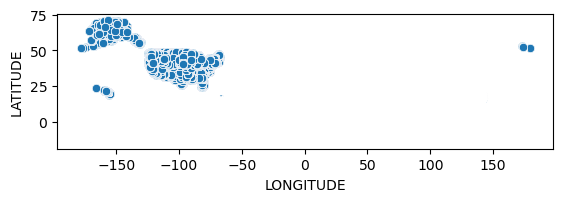

In [76]:
states.plot()
sns.scatterplot(df, x='LONGITUDE', y='LATITUDE')
plt.show()

That plot not being wildly useful, let's start by removing points outside the continental US.

C:\Users\Matthew Dannenberg\AppData\Local\Temp\ipykernel_25344\2249113094.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['STATE'] = df['NAME'].map(lambda x: x[-5:-3], na_action = 'ignore')


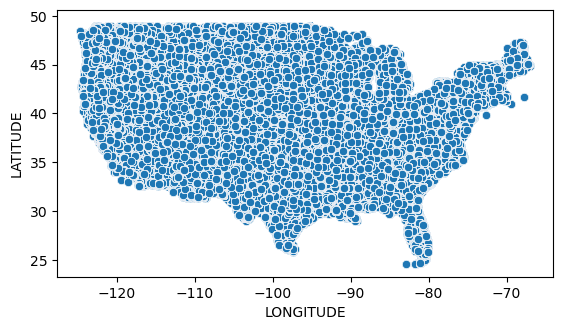

In [82]:
states_to_remove = ['VI', 'MP', 'AK','HI','PR','AS', 'GU']
states = states[~states['STUSPS'].isin(states_to_remove)]
states.plot()

df['STATE'] = df['NAME'].map(lambda x: x[-5:-3], na_action = 'ignore')
df = df[~df['STATE'].isin(states_to_remove)]
sns.scatterplot(df, x='LONGITUDE', y='LATITUDE')

plt.show()

The NOAA dataframe we're using has a large number of features, however most stations do not actually report values for many of them. As such, we'll eliminate a large number of features from the get-go

In [90]:
df = pd.concat([df[df.columns[:-139]],df[df.columns[-1:]]],axis=1)

This process deletes a lot of information, so we'll rename the dataframe so as to keep the old one around in case it is needed.

In [196]:
columns_with_non_NaN = df.columns[7:-1:2]
tdf = df
num_rows = tdf.shape[0]
for i in columns_with_non_NaN:
    tdf = tdf[~tdf[i].isnull()]
    if tdf.shape[0] < num_rows * .9:
        print(str(i) + ' ' + str(tdf.shape[0]))
        num_rows = tdf.shape[0]
tdf = pd.concat([tdf[tdf.columns[1:7]],tdf[tdf.columns[7:-1:2]],tdf[tdf.columns[-1]]],axis=1)
tdf

CDSD 441656
DP01 380726
FZF2 338325
FZF4 284041
HDSD 247658
DSND 146044
DSNW 130180
DYFG 63999
DYTS 57599


,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,CDSD,CLDD,DP01,DP10,...,TMAX,TMIN,DSND,DSNW,EMSD,EMSN,SNOW,DYFG,DYTS,STATE
75311,USC00010163,1952,32.983330,-85.86667,200.9,"ALEXANDER CITY 6 NE, AL US",939.3,939.3,96.0,75.0,...,24.35,9.07,0.0,0.0,0.0,0.0,0.0,2.0,34.0,AL
75315,USC00010163,1956,32.983330,-85.86667,200.9,"ALEXANDER CITY 6 NE, AL US",932.7,932.7,118.0,83.0,...,24.76,9.47,0.0,0.0,0.0,0.0,0.0,1.0,34.0,AL
75316,USC00010163,1957,32.983330,-85.86667,200.9,"ALEXANDER CITY 6 NE, AL US",992.2,992.2,135.0,88.0,...,24.34,10.53,0.0,0.0,0.0,0.0,0.0,2.0,39.0,AL
75321,USC00010163,1962,32.983330,-85.86667,200.9,"ALEXANDER CITY 6 NE, AL US",994.2,994.2,129.0,75.0,...,24.73,8.56,0.0,1.0,0.0,64.0,64.0,2.0,42.0,AL
75501,USC00010260,2005,34.962850,-87.37195,231.6,"LEXINGTON, AL US",847.6,847.6,113.0,68.0,...,21.39,9.01,0.0,0.0,0.0,0.0,0.0,4.0,4.0,AL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
922404,USW00094985,2013,44.637900,-90.18755,381.5,"MARSHFIELD MUNICIPAL AIRPORT, WI US",266.0,266.0,131.0,67.0,...,10.76,0.35,124.0,33.0,430.0,236.0,2228.0,215.0,2.0,WI
922406,USW00094985,2015,44.637900,-90.18755,381.5,"MARSHFIELD MUNICIPAL AIRPORT, WI US",250.4,250.4,96.0,53.0,...,13.00,2.37,82.0,10.0,280.0,178.0,874.0,186.0,33.0,WI
922570,USW00094993,2014,45.669018,-96.99183,353.0,"SISSETON MUNICIPAL AIRPORT, SD US",234.3,234.3,100.0,43.0,...,11.14,-0.39,102.0,11.0,250.0,152.0,961.0,1.0,5.0,SD
922571,USW00094993,2015,45.669018,-96.99183,353.0,"SISSETON MUNICIPAL AIRPORT, SD US",339.6,339.6,92.0,43.0,...,14.08,1.62,83.0,11.0,200.0,114.0,804.0,1.0,7.0,SD


Now, we'll limit our data to our years of concern - 1950-2024.

In [200]:
tdf = tdf.query('DATE >= 1950 and DATE <= 2024')

C:\Users\Matthew Dannenberg\AppData\Local\Temp\ipykernel_25344\3937005915.py:9: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


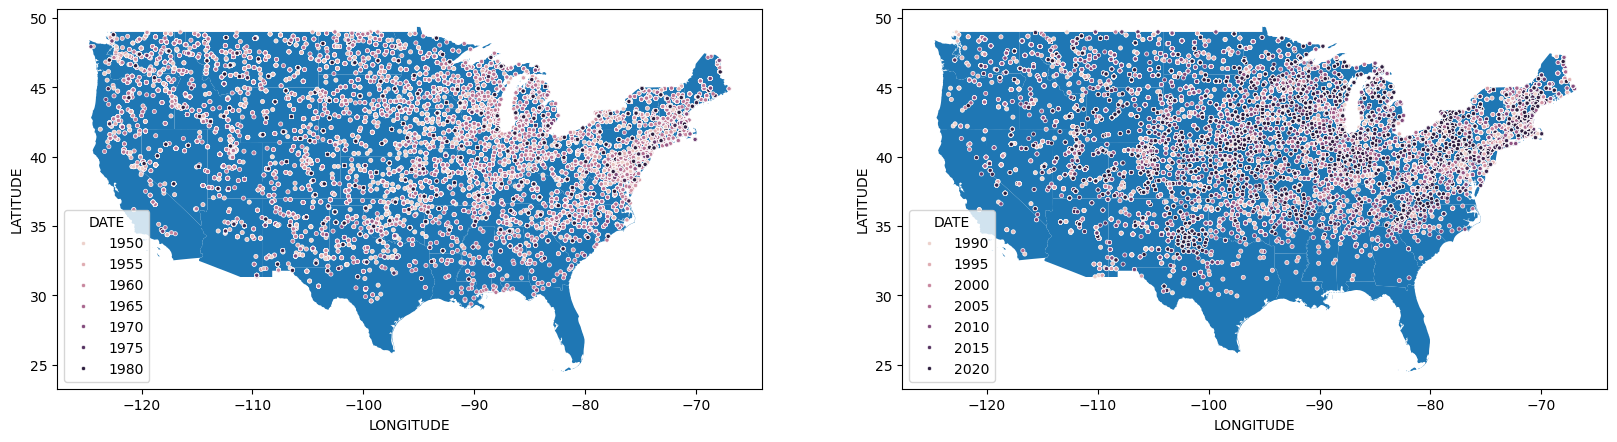

In [212]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,40)
ax1 = axs[0]
ax2 = axs[1]
states.plot(ax=ax1)
states.plot(ax=ax2)
sns.scatterplot(tdf.query('DATE <= 1980'), x='LONGITUDE', y='LATITUDE',marker='.',hue='DATE', ax=ax1)
sns.scatterplot(tdf.query('DATE >= 1990 and DATE <= 2020'), x='LONGITUDE', y='LATITUDE',marker='.',hue='DATE', ax=ax2)
fig.show()

In [168]:
tdf.columns[7:-28:2]

Index(['CDSD', 'CLDD', 'DP01', 'DP10', 'DP1X', 'DT00', 'DT32', 'DX32', 'DX70',
       'DX90', 'EMNT', 'EMXP', 'EMXT', 'FZF0', 'FZF1', 'FZF2', 'FZF3', 'FZF4',
       'FZF5', 'FZF6', 'FZF7', 'FZF8', 'FZF9'],
      dtype='object')

In [132]:
tdf.columns

Index(['index', 'STATION', 'DATE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'CDSD', 'CDSD_ATTRIBUTES', 'CLDD', 'CLDD_ATTRIBUTES', 'DP01',
       'DP01_ATTRIBUTES', 'DP10', 'DP10_ATTRIBUTES', 'DP1X', 'DP1X_ATTRIBUTES',
       'DT00', 'DT00_ATTRIBUTES', 'DT32', 'DT32_ATTRIBUTES', 'DX32',
       'DX32_ATTRIBUTES', 'DX70', 'DX70_ATTRIBUTES', 'DX90', 'DX90_ATTRIBUTES',
       'EMNT', 'EMNT_ATTRIBUTES', 'EMXP', 'EMXP_ATTRIBUTES', 'EMXT',
       'EMXT_ATTRIBUTES', 'FZF0', 'FZF0_ATTRIBUTES', 'FZF1', 'FZF1_ATTRIBUTES',
       'FZF2', 'FZF2_ATTRIBUTES', 'FZF3', 'FZF3_ATTRIBUTES', 'FZF4',
       'FZF4_ATTRIBUTES', 'FZF5', 'FZF5_ATTRIBUTES', 'FZF6', 'FZF6_ATTRIBUTES',
       'FZF7', 'FZF7_ATTRIBUTES', 'FZF8', 'FZF8_ATTRIBUTES', 'FZF9',
       'FZF9_ATTRIBUTES', 'HDSD', 'HDSD_ATTRIBUTES', 'HTDD', 'HTDD_ATTRIBUTES',
       'PRCP', 'PRCP_ATTRIBUTES', 'TAVG', 'TAVG_ATTRIBUTES', 'TMAX',
       'TMAX_ATTRIBUTES', 'TMIN', 'TMIN_ATTRIBUTES', 'DSND', 'DSND_ATTRIBUTES',
       'DSNW', 'DSNW_ATTR

In [159]:
tdf['FZF0'].value_counts(normalize=True,dropna=False)

FZF0
 0.0     0.284837
-0.6     0.184080
-1.1     0.154429
-1.7     0.097876
-2.2     0.070894
           ...   
-10.9    0.000003
-14.3    0.000003
-9.1     0.000003
-9.9     0.000003
-7.7     0.000003
Name: proportion, Length: 110, dtype: float64